# Data Cleaning and Preparation

In [332]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## Handling Missing Data

In [333]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [334]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

### Filtering Out Missing Data

In [335]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [336]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [337]:


data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data
cleaned

,0,1,2
0,1.0,6.5,3.0


In [338]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [339]:
data[4] = NA
data
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [340]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df
df.dropna()
df.dropna(thresh=2)

,0,1,2
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


### Filling In Missing Data

In [341]:
df.fillna(0)

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [342]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.204708,0.500000,0.000000
1,-0.555730,0.500000,0.000000
2,0.092908,0.500000,0.769023
3,1.246435,0.500000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [343]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [344]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df
df.fillna(method='ffill')
df.fillna(method='ffill', limit=2)

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,NaN,-2.370232
5,-1.265934,NaN,-2.370232


In [345]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Data Transformation

### Removing Duplicates

In [346]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [347]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [348]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [349]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [350]:



data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Transforming Data Using a Function or Mapping

In [351]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [352]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [353]:
lowercased = data['food'].str.lower()
lowercased
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [354]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing Values

In [355]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [356]:

data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [357]:

data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [358]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [359]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


### Renaming Axis Indexes

In [360]:

data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [361]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [362]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [363]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [364]:

data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [365]:

data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11





### Discretization and Binning

In [366]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [367]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [368]:
cats.codes
cats.categories
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [369]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [370]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [371]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.34, 0.55], (0.34, 0.55], (0.76, 0.97], (0.76, 0.97], (0.34, 0.55], ..., (0.34, 0.55], (0.34, 0.55], (0.55, 0.76], (0.34, 0.55], (0.12, 0.34]]
Length: 20
Categories (4, interval[float64]): [(0.12, 0.34] < (0.34, 0.55] < (0.55, 0.76] < (0.76, 0.97]]

In [372]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats
pd.value_counts(cats)

(0.62, 3.928]                   250
(-0.0265, 0.62]                 250
(-0.68, -0.0265]                250
(-2.9499999999999997, -0.68]    250
dtype: int64

In [373]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-0.0265, 1.286], (-0.0265, 1.286], (-1.187, -0.0265], (-0.0265, 1.286], (-0.0265, 1.286], ..., (-1.187, -0.0265], (-1.187, -0.0265], (-2.9499999999999997, -1.187], (-0.0265, 1.286], (-1.187, -0.0265]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -1.187] < (-1.187, -0.0265] < (-0.0265, 1.286] < (1.286, 3.928]]

### Detecting and Filtering Outliers

In [374]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.049091,0.026112,-0.002544,-0.051827
std,0.996947,1.007458,0.995232,0.998311
min,-3.645860,-3.184377,-3.745356,-3.428254
25%,-0.599807,-0.612162,-0.687373,-0.747478
50%,0.047101,-0.013609,-0.022158,-0.088274
75%,0.756646,0.695298,0.699046,0.623331
max,2.653656,3.525865,2.735527,3.366626


In [375]:
col = data[2]
col[np.abs(col) > 3]

41    -3.399312
136   -3.745356
Name: 2, dtype: float64

In [376]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
41,0.457246,-0.025907,-3.399312,-0.974657
60,1.951312,3.260383,0.963301,1.201206
136,0.508391,-0.196713,-3.745356,-1.520113
235,-0.242459,-3.056990,1.918403,-0.578828
258,0.682841,0.326045,0.425384,-3.428254
322,1.179227,-3.184377,1.369891,-1.074833
544,-3.548824,1.553205,-2.186301,1.277104
635,-0.578093,0.193299,1.397822,3.366626
782,-0.207434,3.525865,0.283070,0.544635
803,-3.645860,0.255475,-0.549574,-1.907459


In [377]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.050286,0.025567,-0.001399,-0.051765
std,0.992920,1.004214,0.991414,0.995761
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.599807,-0.612162,-0.687373,-0.747478
50%,0.047101,-0.013609,-0.022158,-0.088274
75%,0.756646,0.695298,0.699046,0.623331
max,2.653656,3.000000,2.735527,3.000000


In [378]:
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,-1.0,1.0
1,1.0,-1.0,1.0,-1.0
2,1.0,1.0,1.0,-1.0
3,-1.0,-1.0,1.0,-1.0
4,-1.0,1.0,-1.0,-1.0


### Permutation and Random Sampling

In [48]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([3, 1, 4, 2, 0])

In [49]:
df
df.take(sampler)

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11
0,0,1,2,3


In [50]:
df.sample(n=3)

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
2,8,9,10,11


In [51]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

4    4
1    7
4    4
2   -1
0    5
3    6
1    7
4    4
0    5
4    4
dtype: int64

### Computing Indicator/Dummy Variables

In [52]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [53]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [54]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

C:\Users\SyedA\anaconda3\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [55]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [56]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [57]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [58]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [59]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [60]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                      1
title                          Toy Story (1995)
genres              Animation|Children's|Comedy
Genre_Animation                               1
Genre_Children's                              1
                               ...             
Genre_War                                     0
Genre_Musical                                 0
Genre_Mystery                                 0
Genre_Film-Noir                               0
Genre_Western                                 0
Name: 0, Length: 21, dtype: object

In [61]:
np.random.seed(12345)
values = np.random.rand(10)
values
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## String Manipulation

### String Object Methods

In [62]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [63]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [64]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [65]:
'::'.join(pieces)

'a::b::guido'

In [66]:
'guido' in val
val.index(',')
val.find(':')

-1

In [67]:
val.index(':')

ValueError: substring not found

In [ ]:
val.count(',')

In [ ]:
val.replace(',', '::')
val.replace(',', '')

### Regular Expressions

In [ ]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

In [ ]:
regex = re.compile('\s+')
regex.split(text)

In [ ]:
regex.findall(text)

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

In [ ]:
m = regex.search(text)
m
text[m.start():m.end()]

In [ ]:
print(regex.match(text))

In [ ]:
print(regex.sub('REDACTED', text))

In [ ]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
m = regex.match('wesm@bright.net')
m.groups()

In [ ]:
regex.findall(text)

In [ ]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

### Vectorized String Functions in pandas

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data
data.isnull()

In [ ]:
data.str.contains('gmail')

In [ ]:
pattern
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

In [ ]:
matches.str.get(1)
matches.str[0]

In [ ]:
data.str[:5]

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion

In [379]:
a=pd.read_csv('C:/Users/SyedA/OneDrive/Desktop/CarSelling Portal Data.csv')
a

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [380]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
import statsmodels.api as sm
sns.set()
from sklearn.linear_model import LinearRegression

In [382]:
a.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [383]:
a.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [384]:
a.describe(

)

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [385]:
a

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [386]:
a.dropna(inplace=True)

In [387]:
a.head(

)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [388]:
a['Brand'].head()

0              BMW
1    Mercedes-Benz
2    Mercedes-Benz
3             Audi
4           Toyota
Name: Brand, dtype: object

In [389]:
a.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [390]:
a.drop(['Model'],inplace=True,axis=1)
a.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [86]:
a.isnull().sum()





Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [87]:
a.notnull().sum()

Brand           4025
Price           4025
Body            4025
Mileage         4025
EngineV         4025
Engine Type     4025
Registration    4025
Year            4025
dtype: int64

In [88]:
a.notnull().sum().sum()

32200

In [89]:
a.dropna(axis=0,inplace=True)

In [90]:
a

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [92]:
a.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [93]:
a.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


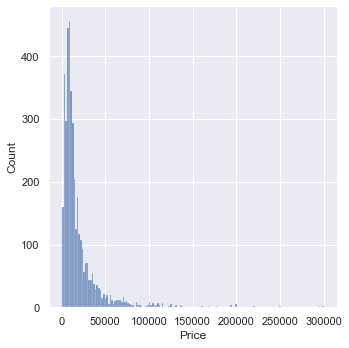

In [94]:
sns.displot(a['Price'])

In [96]:
a['Price'].quantile(0.99)
a['Price']<a['Price'].quantile(0.99)

0       True
1       True
2       True
3       True
4       True
        ... 
4339    True
4340    True
4341    True
4342    True
4344    True
Name: Price, Length: 4025, dtype: bool

In [97]:
a.shape

(4025, 8)

In [101]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [113]:
a.to_numpy()

array([['BMW', 4200.0, 'sedan', ..., 'Petrol', 'yes', 1991],
       ['Mercedes-Benz', 7900.0, 'van', ..., 'Diesel', 'yes', 1999],
       ['Mercedes-Benz', 13300.0, 'sedan', ..., 'Gas', 'yes', 2003],
       ...,
       ['BMW', 6500.0, 'sedan', ..., 'Petrol', 'yes', 1999],
       ['BMW', 8000.0, 'sedan', ..., 'Petrol', 'yes', 1985],
       ['Volkswagen', 13500.0, 'van', ..., 'Diesel', 'yes', 2013]],
      dtype=object)

In [114]:
a.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [115]:
a['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [116]:
a['Price'].unique()

array([  4200.  ,   7900.  ,  13300.  ,  23000.  ,  18300.  , 199999.  ,
         6100.  ,  14200.  ,  10799.  ,   1400.  ,  11950.  ,   2500.  ,
         9500.  ,  10500.  ,  16000.  ,   8600.  ,   2990.  ,  26500.  ,
         3500.  ,  38233.  ,   7500.  ,   6800.  ,  24900.  ,  20800.  ,
         6500.  ,  13566.  ,   8500.  ,   2900.  ,  21500.  ,  17900.  ,
        28500.  ,   9800.  ,  14500.  ,   6000.  ,  67500.  ,  33900.  ,
        63000.  ,   7700.  ,   9600.  ,  12800.  ,  41000.  ,   3700.  ,
        29500.  ,   8250.  ,  19500.  ,  13500.  ,   9200.  ,   5000.  ,
        23900.  ,  36900.  ,   8900.  ,   7800.  , 133000.  ,   1650.  ,
        50000.  ,   9700.  ,   9999.  ,  69999.  ,   4300.  ,   3000.  ,
         8700.  ,   9000.  ,  20400.  ,  13400.  ,   9850.  ,  15700.  ,
        24500.  ,  11990.  ,  13708.5 ,   8200.  ,   6999.  ,   6750.  ,
        18500.  ,  14299.  ,  17000.  ,  25700.  ,   2650.  ,   4000.  ,
        11000.  ,   4099.  ,  31500.  ,   4500.  , 

In [117]:
a['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [118]:
a.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [119]:
a['Year'].unique()

array([1991, 1999, 2003, 2007, 2011, 2016, 1997, 2006, 2012, 1994, 2008,
       2001, 2013, 1998, 2010, 1989, 2009, 1996, 2014, 2004, 1987, 1990,
       1995, 2002, 2015, 2005, 2000, 1992, 1988, 1980, 1979, 1986, 1985,
       1993, 1969, 1984, 1978, 1983, 1982], dtype=int64)

In [125]:
# view dimensions of dataframe 'a'
a.shape

(4025, 8)

In [126]:
# first five rows or Returns default as first five rows
a.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [129]:
a.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'],
      dtype='object')

In [131]:
# Renaming
a.rename(columns={'Brand':'BRAND','Price':'PRICE','Body':'BODY','Mileage':'MILEAGE','EngineV':'ENGINEV'},inplace=True)

In [132]:
a

,BRAND,PRICE,BODY,MILEAGE,ENGINEV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [133]:
# sumarry of DataFrame
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BRAND         4025 non-null   object 
 1   PRICE         4025 non-null   float64
 2   BODY          4025 non-null   object 
 3   MILEAGE       4025 non-null   int64  
 4   ENGINEV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [139]:
# Correlation
a.corr()

,PRICE,MILEAGE,ENGINEV,Year
PRICE,1.000000,-0.473523,0.058664,0.485734
MILEAGE,-0.473523,1.000000,0.024935,-0.664573
ENGINEV,0.058664,0.024935,1.000000,-0.030321
Year,0.485734,-0.664573,-0.030321,1.000000


In [141]:
a['Year'].sort_values(ascending=False)

2481    2016
2008    2016
190     2016
1912    2016
4139    2016
        ... 
1896    1979
288     1979
1025    1978
4319    1978
810     1969
Name: Year, Length: 4025, dtype: int64

In [145]:
a.isnull().sum()

BRAND           0
PRICE           0
BODY            0
MILEAGE         0
ENGINEV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [146]:
a.describe()

,PRICE,MILEAGE,ENGINEV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [147]:
a.rename(columns={'Year':'YEAR'},inplace=True)

In [148]:
a

,BRAND,PRICE,BODY,MILEAGE,ENGINEV,Engine Type,Registration,YEAR
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [153]:
# Importing ,skelarn.model_validation renames as sklearn.model_selection
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [154]:
from sklearn.datasets import load_boston
load_boston()


{'data': array([[  0.0063,  18.    ,   2.31  , ...,  15.3   , 396.9   ,   4.98  ],
        [  0.0273,   0.    ,   7.07  , ...,  17.8   , 396.9   ,   9.14  ],
        [  0.0273,   0.    ,   7.07  , ...,  17.8   , 392.83  ,   4.03  ],
        ...,
        [  0.0608,   0.    ,  11.93  , ...,  21.    , 396.9   ,   5.64  ],
        [  0.1096,   0.    ,  11.93  , ...,  21.    , 393.45  ,   6.48  ],
        [  0.0474,   0.    ,  11.93  , ...,  21.    , 396.9   ,   7.88  ]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,

In [155]:
a

,BRAND,PRICE,BODY,MILEAGE,ENGINEV,Engine Type,Registration,YEAR
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [163]:
a.describe()

,PRICE,MILEAGE,ENGINEV,YEAR
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [165]:
rg=linear_model.LinearRegression()

In [169]:
x_train,x_test=train_test_split(a,test_size=0.2,random_state=4)

In [181]:
a.head()

,BRAND,PRICE,BODY,MILEAGE,ENGINEV,Engine Type,Registration,YEAR
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [186]:
x=a.iloc[:,1].values
y=a.iloc[:,3].values

In [187]:
display(x,y)

array([ 4200.,  7900., 13300., ...,  6500.,  8000., 13500.])

array([277, 427, 358, ...,   1, 194, 124], dtype=int64)

In [188]:
x.shape

(4025,)

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [192]:
x_test

array([  7900.  ,  24800.  ,  22800.  ,   7700.  ,   8500.  ,  12800.  ,
        39999.  ,   2999.  ,  47600.  ,  40000.  ,  22900.  ,  10500.  ,
         4800.  ,  10600.  ,   6700.  ,  10700.  ,  17900.  ,  39500.  ,
        12850.  ,  29999.  ,   8999.  ,   4700.  ,   3650.  ,  25200.  ,
        10800.  ,   9658.94,   3200.  ,  13500.  ,  86999.  ,  39900.  ,
       103333.  ,   2500.  ,  13900.  ,   6600.  ,   2800.  ,  51500.  ,
        11500.  ,  36000.  ,   6750.  ,   8500.  ,  15800.  ,  11800.  ,
         6300.  ,  11500.  ,  28500.  ,  11600.  ,   7400.  ,   8500.  ,
        32500.  ,  45500.  ,   8500.  ,  53500.  ,   5200.  ,  37600.  ,
         9400.  ,   2900.  ,   3700.  ,  18300.  ,   7900.  ,   9300.  ,
        24500.  ,  57000.  ,   6200.  ,   9200.  ,  33500.  ,  28900.  ,
        23300.  ,  10500.  ,  15000.  ,   4400.  ,   3300.  ,   7200.  ,
        15900.  ,  11999.  ,   9800.  ,   6200.  ,   2900.  ,   7300.  ,
        44600.  ,   4000.  ,  61500.  ,  65000.  , 

In [193]:
display(x_test.shape)

(805,)

In [195]:
display(x_train,x_train.shape)

array([ 7700.,  4700., 32000., ...,  2350., 12600., 28700.])

(3220,)

In [197]:
from sklearn.linear_model import LinearRegression

In [198]:
reg=LinearRegression()

In [203]:
a.to_numpy()

array([['BMW', 4200.0, 'sedan', ..., 'Petrol', 'yes', 1991],
       ['Mercedes-Benz', 7900.0, 'van', ..., 'Diesel', 'yes', 1999],
       ['Mercedes-Benz', 13300.0, 'sedan', ..., 'Gas', 'yes', 2003],
       ...,
       ['BMW', 6500.0, 'sedan', ..., 'Petrol', 'yes', 1999],
       ['BMW', 8000.0, 'sedan', ..., 'Petrol', 'yes', 1985],
       ['Volkswagen', 13500.0, 'van', ..., 'Diesel', 'yes', 2013]],
      dtype=object)

In [204]:
a

,BRAND,PRICE,BODY,MILEAGE,ENGINEV,Engine Type,Registration,YEAR
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [209]:
import warnings
warnings.filterwarnings('ignore')

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
x=[[4200],[7900],[13300],[23000],[18300],[199999],[6100],[14200],[10799],[1400],[11950],[2500],[9500],[10500],[16000],[8600],[2990],[NA],[26500],[3500],[38233],[7500],[6800],[10500],[24900],[20800],[6500],[13566],[8500],[NA],[2900],[21500],[17900],[28500],[9800],[14500],[6000],[67500],[33900],[2500],[9800],[63000],[7700],[9600],[12800],[41000],[2500],[3700],[29500],[6500]]

In [218]:
y=[[277],[427],[358],[240],[120],[0],[438],[200],[193],[212],[177],[260],[165],[100],[250],[84],[203],[240],[21],[250],[0],[132],[225],[130],[163],[151],[330],[171],[65],[0],[1],[72],[87],[160],[160],[147],[300],[1],[14],[180],[230],[86],[326],[30],[181],[80],[220],[231],[134],[335]]

In [216]:
a

,BRAND,PRICE,BODY,MILEAGE,ENGINEV,Engine Type,Registration,YEAR
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [217]:
a.dropna(inplace=True)

In [222]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [391]:
model.fit(x,y)

LinearRegression()

In [228]:
a = a.reset_index()

In [229]:
a

,index,BRAND,PRICE,BODY,MILEAGE,ENGINEV,Engine Type,Registration,YEAR
0,0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...,...
4020,4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4021,4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4022,4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4023,4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [230]:
a.dropna(inplace=True)

In [241]:
type(x)

list

In [250]:
x=np.array(x)


In [251]:
y=np.array(y)

In [252]:
x

array([[  4200.],
       [  7900.],
       [ 13300.],
       [ 23000.],
       [ 18300.],
       [199999.],
       [  6100.],
       [ 14200.],
       [ 10799.],
       [  1400.],
       [ 11950.],
       [  2500.],
       [  9500.],
       [ 10500.],
       [ 16000.],
       [  8600.],
       [  2990.],
       [    nan],
       [ 26500.],
       [  3500.],
       [ 38233.],
       [  7500.],
       [  6800.],
       [ 10500.],
       [ 24900.],
       [ 20800.],
       [  6500.],
       [ 13566.],
       [  8500.],
       [    nan],
       [  2900.],
       [ 21500.],
       [ 17900.],
       [ 28500.],
       [  9800.],
       [ 14500.],
       [  6000.],
       [ 67500.],
       [ 33900.],
       [  2500.],
       [  9800.],
       [ 63000.],
       [  7700.],
       [  9600.],
       [ 12800.],
       [ 41000.],
       [  2500.],
       [  3700.],
       [ 29500.],
       [  6500.]])

In [253]:
type(x)

numpy.ndarray

In [259]:
x=pd.DataFrame(x)

In [261]:
x.dropna(inplace=True)

In [262]:
x

,0
0,4200.0
1,7900.0
2,13300.0
3,23000.0
4,18300.0
...,...
45,41000.0
46,2500.0
47,3700.0
48,29500.0


In [263]:
y

array([[277],
       [427],
       [358],
       [240],
       [120],
       [  0],
       [438],
       [200],
       [193],
       [212],
       [177],
       [260],
       [165],
       [100],
       [250],
       [ 84],
       [203],
       [240],
       [ 21],
       [250],
       [  0],
       [132],
       [225],
       [130],
       [163],
       [151],
       [330],
       [171],
       [ 65],
       [  0],
       [  1],
       [ 72],
       [ 87],
       [160],
       [160],
       [147],
       [300],
       [  1],
       [ 14],
       [180],
       [230],
       [ 86],
       [326],
       [ 30],
       [181],
       [ 80],
       [220],
       [231],
       [134],
       [335]])

In [264]:
y=pd.DataFrame(y)
y

,0
0,277
1,427
2,358
3,240
4,120
...,...
45,80
46,220
47,231
48,134


In [266]:
y.dropna(inplace=True)

In [267]:
y

,0
0,277
1,427
2,358
3,240
4,120
...,...
45,80
46,220
47,231
48,134


In [331]:
model.fit(x,y)

LinearRegression()

In [269]:
x.shape

(48, 1)

In [270]:
y.shape

(50, 1)

In [272]:
x.mean()

0    19159.104167
dtype: float64

In [273]:
x

,0
0,4200.0
1,7900.0
2,13300.0
3,23000.0
4,18300.0
...,...
45,41000.0
46,2500.0
47,3700.0
48,29500.0


In [274]:
y

,0
0,277
1,427
2,358
3,240
4,120
...,...
45,80
46,220
47,231
48,134


In [280]:
y.drop([48,49],inplace=True)

In [281]:
x

,0
0,4200.0
1,7900.0
2,13300.0
3,23000.0
4,18300.0
...,...
45,41000.0
46,2500.0
47,3700.0
48,29500.0


In [282]:
y

,0
0,277
1,427
2,358
3,240
4,120
...,...
43,30
44,181
45,80
46,220


In [283]:
x.shape

(48, 1)

In [284]:
y.shape

(48, 1)

In [289]:
model.fit(x,y)

LinearRegression()

In [292]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [317]:
def CarPricePredict(Area):
    print(x,model.predict([y][0]))

In [318]:
i=interact (CarPricePredict,Area=(0,3000))

interactive(children=(IntSlider(value=1500, description='Area', max=3000), Output()), _dom_classes=('widget-in…

In [329]:
import numpy as np
print('Residual sum of squares: %.2f' %np.mean((model.predict(x)-y)**2))

Residual sum of squares: 11406.47


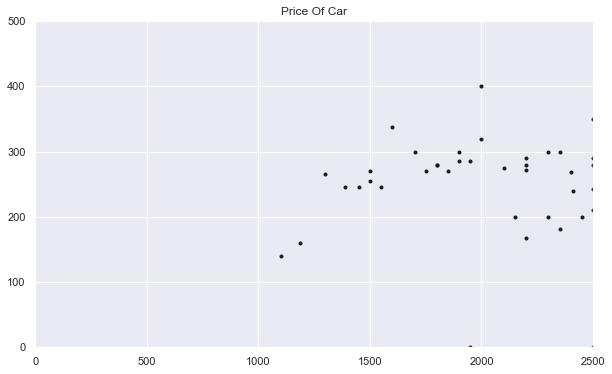

In [393]:
plt.figure()
plt.title('Price Of Car')
plt.plot(x_test,y_test,'k.')
plt.axis([0,2500,0,500])
plt.grid(True)
plt.show()

In [394]:
a.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [395]:
b=pd.read_csv('C:/Users/SyedA/OneDrive/Desktop/CarSelling Portal Data.csv')
b

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Importing relevant liberaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlit.pyplot as plt
